# Clase 6: matrices y pandas

Docente: Emiliano López - ``emiliano.lopez@gmail.com`` - tw: @yosobreip
- Fecha: 31-10-2019
- Unidad: numpy, matplotlib y pandas
- Temas:
    - Matrices Numpy (nd-array)
    - Matplotlib imshow.
    - intro a pandas.
    

- Referencias:
    - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
    - https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
    

    
## Matrices: numpy ndarray

In [3]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Cargamos una imagen

- Veamos su estructura

In [4]:
i = Image.open('datos/pics/lapacho2.jpg')
im = np.array(i)

print(type(im))
print(im.dtype)
print(im.ndim)
print(im.shape)

<class 'numpy.ndarray'>
uint8
3
(1280, 960, 3)


### Visualizamos la imagen

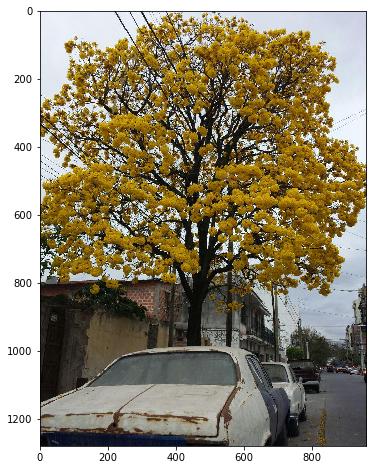

In [5]:
plt.figure(figsize = (8, 8))
plt.imshow(im);

### Visualizamos el valor de los pixeles

Analicemos como se muestra en valor de los pixeles de una submatriz usando slices

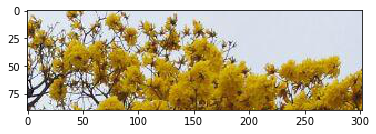

In [6]:
recortada = im[10:100, 440:742,:]
plt.imshow(recortada)

In [39]:
# un pixel
im[4,5,0]

235

### Veamos los componentes RGB
- Veamos como concatenar tres imágenes seguidas con cada uno de los componentes R, G y B.
- Notar que el método ``.copy()`` genera otra matriz, por lo tanto sin modificar la original

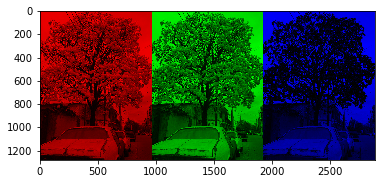

In [41]:
im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
plt.imshow(im_RGB);

#### Ejercitación 6.1

- Recorrer la imagen usando dos ciclos for anidados y cambiar aquellos pixeles donde el promedio entre el componente rojo, verde y azul sea mayor a 200, por el color azul (0, 0, 255)

In [7]:
filas, columnas, n = im.shape

for f in range(filas):
    for c in range(columnas):
        if im[f,c].mean()>200:
            im[f,c,0] = 0
            im[f,c,1] = 0
            im[f,c,2] = 255

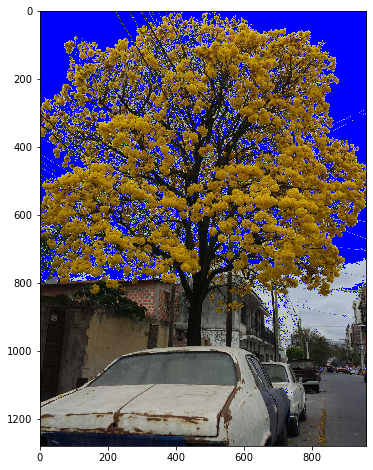

In [9]:
plt.figure( figsize = (8, 8))
plt.imshow(im)

## Intro a Pandas

- Documentación oficial:
    - https://pandas.pydata.org/
    - https://pandas.pydata.org/pandas-docs/stable/
- Veremos:
    - conceptos generales: 
        - dataframe
        - series
        - índices


### Revisión de ejercicio previo

- Analicemos el siguiente programa (realizado en consulta la semana pasada)
- ¿Cómo está formado el contenedor de datos? ¿Cómo va mutando con el correr del programa?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Armamos un diccionario con los datos
# ====================================
eph = open("datos/eph_pobreza2019.csv").readlines()
header = eph[0]
datos_eph = {}

## obtenemos los nombres de las columnas como claves del diccionario
for columna in header.split(";"):
    columna = columna.strip().lower()
    datos_eph[columna] = []

## cargamos valores (como str)
for r in eph[1:]:
    data_r = r.split(";")
    for clave, val in zip(datos_eph, data_r):
        datos_eph[clave].append(val)

# Todo a numpy
# ============
## Convierto cada lista a numpy
for k in datos_eph:
    datos_eph[k] = np.array(datos_eph[k])

## Convierto a datos float los que deberían serlo, a partir de la 3ra columna
claves_con_num = list(datos_eph.keys())[2:]
for k in claves_con_num:
    datos_eph[k] = datos_eph[k].astype(np.float)

# Operamos arreglos numpy
# =======================
dp = datos_eph["pobrezahogares"] + datos_eph["pobrezapersonas"]

# Visualizamos
# ============
plt.bar(datos_eph["subregiones"], dp)
plt.xticks(rotation=90)
plt.title("Pobreza")

Text(0.5, 1.0, 'Pobreza')

In [17]:
plt.bar?

### Dataframes a partir de un diccionario

- Creamos un dataframe a partir del diccionario previo

In [3]:
import pandas as pd

data = pd.DataFrame(datos_eph)

regiones
subregiones
pobrezahogares
pobrezapersonas
indigenciahogares
indigenciapersonas


- Vemos su contenido usando los métodos .head() y .tail()

In [14]:
data.head(7)

regiones                      subregiones  pobrezahogares  \
0  Gran Buenos Aires   Ciudad Autónoma de Buenos Aires             8.4   
1  Gran Buenos Aires                  Partidos del GBA            30.3   
2                Cuyo                 Gran Mendoza (3)            27.3   
3                Cuyo               Gran San Juan (3)             20.1   
4                Cuyo                    Gran San Luis            25.0   
5             Noreste                      Corrientes             33.1   
6             Noreste                          Formosa            31.2   

   pobrezapersonas  indigenciahogares  indigenciapersonas  
0             14.3                2.8                 4.8  
1             39.8                7.0                 9.1  
2             37.6                5.1                 6.6  
3             30.3                3.9                 6.3  
4             34.5                1.9                 2.4  
5             41.4                8.8                11.2  
6             40.1                5.6                 7.6

In [13]:
data.tail(20)

regiones                          subregiones  pobrezahogares  \
12   Noroeste                        La Rioja (3)             22.9   
13   Noroeste                                Salta            32.1   
14   Noroeste     Santiago del Estero-La Banda (3)            34.5   
15   Pampeana                   Bahía Blanca-Cerri            17.5   
16   Pampeana                       Concordia (3)             41.4   
17   Pampeana                         Gran Córdoba            25.5   
18   Pampeana                       Gran La Plata             22.7   
19   Pampeana                         Gran Rosario            25.5   
20   Pampeana                      Gran Paraná (3)            24.1   
21   Pampeana                        Gran Santa Fe            26.2   
22   Pampeana                        Mar del Plata            20.5   
23   Pampeana                           Río Cuarto            22.7   
24   Pampeana                      Santa Rosa-Toay            24.5   
25   Pampeana  San Nicolás-Villa Constitución (3)             25.8   
26  Patagonia        Comodoro Rivadavia-Rada Tilly            21.7   
27  Patagonia                     Neuquén-Plottier            20.5   
28  Patagonia                         Río Gallegos            18.1   
29  Patagonia                   Ushuaia-Río Grande            18.1   
30  Patagonia                   Rawson-Trelew (3)             27.8   
31  Patagonia           Viedma-Carmen de Patagones            23.1   

    pobrezapersonas  indigenciahogares  indigenciapersonas  
12             29.6                2.8                 4.2  
13             41.8                6.3                 7.7  
14             44.8                2.4                 3.3  
15             24.1                3.1                 4.1  
16             52.9               11.3                15.4  
17             36.6                5.8                 9.4  
18             31.9                4.4                 6.5  
19             35.5                4.4                 5.7  
20             33.9                4.1                 5.8  
21             38.2                3.6                 5.9  
22             29.5                3.5                 6.3  
23             33.5                5.2                 6.8  
24             36.2                6.1                 9.3  
25             35.9                7.4                10.0  
26             29.0                2.4                 2.8  
27             26.3                3.1                 3.6  
28             22.7                3.2                 4.0  
29             24.0                3.1                 3.9  
30             37.5                5.4                 7.4  
31             36.2                2.2                 3.4

In [12]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
data.describe()

pobrezahogares  pobrezapersonas  indigenciahogares  indigenciapersonas
count       32.000000        32.000000          32.000000           32.000000
mean        25.718750        35.031250           4.812500            6.725000
std          6.395989         7.680786           2.401444            3.210869
min          8.400000        14.300000           1.900000            2.400000
25%         22.450000        30.125000           3.100000            4.175000
50%         25.500000        36.050000           4.250000            6.300000
75%         30.300000        39.875000           5.650000            7.850000
max         41.400000        52.900000          11.900000           15.900000

**Otro ejemplo con un diccionario definido explícitamente**

In [61]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

data_trigo = pd.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})
data_trigo.head()

t       sin       cos
0 -6.000000  0.279415  0.960170
1 -5.368421  0.792419  0.609977
2 -4.736842  0.999701  0.024451
3 -4.105263  0.821291 -0.570509
4 -3.473684  0.326021 -0.945363

### Dataframe a partir de un archivo CSV

In [4]:
import pandas as pd
data2 = pd.read_csv("datos/eph_pobreza2019.csv")


Regiones;Subregiones;PobrezaHogares ; PobrezaPersonas ; IndigenciaHogares; IndigenciaPersonas


In [19]:
data2.head()

Regiones;Subregiones;PobrezaHogares ; PobrezaPersonas ; IndigenciaHogares; IndigenciaPersonas
0  Gran Buenos Aires ;Ciudad Autónoma de Buenos A...                                           
1  Gran Buenos Aires ;Partidos del GBA;30.3;39.8;...                                           
2           Cuyo;Gran Mendoza (3);27.3;37.6;5.1; 6.6                                           
3         Cuyo;Gran San Juan (3) ;20.1;30.3;3.9; 6.3                                           
4              Cuyo;Gran San Luis;25.0;34.5;1.9; 2.4

**Claro, ¿cómo sabe el caracter separador?**

In [5]:
data2 = pd.read_csv("datos/eph_pobreza2019.csv", sep=";")
data2.head()



Regiones
Subregiones
PobrezaHogares 
 PobrezaPersonas 
 IndigenciaHogares
 IndigenciaPersonas


In [25]:
# vemos nombre de las columnas
data2.columns

Index(['Regiones', 'Subregiones', 'PobrezaHogares ', ' PobrezaPersonas ',
       ' IndigenciaHogares', ' IndigenciaPersonas'],
      dtype='object')

In [6]:
# renombramos las columnas con espacios
data2 = data2.rename(columns={'PobrezaHogares ': 'PobrezaHogares', 
                              ' PobrezaPersonas ':'PobrezaPersonas',
                              ' IndigenciaHogares':'IndigenciaHogares', 
                              ' IndigenciaPersonas': 'IndigenciaPersonas'})



Regiones
Subregiones
PobrezaHogares
PobrezaPersonas
IndigenciaHogares
IndigenciaPersonas


In [37]:
data2.columns

Index(['Regiones', 'Subregiones', 'PobrezaHogares', 'PobrezaPersonas',
       'IndigenciaHogares', 'IndigenciaPersonas'],
      dtype='object')

In [38]:
data2.head()

Regiones                      Subregiones  PobrezaHogares  \
0  Gran Buenos Aires   Ciudad Autónoma de Buenos Aires             8.4   
1  Gran Buenos Aires                  Partidos del GBA            30.3   
2                Cuyo                 Gran Mendoza (3)            27.3   
3                Cuyo               Gran San Juan (3)             20.1   
4                Cuyo                    Gran San Luis            25.0   

   PobrezaPersonas  IndigenciaHogares  IndigenciaPersonas  
0             14.3                2.8                 4.8  
1             39.8                7.0                 9.1  
2             37.6                5.1                 6.6  
3             30.3                3.9                 6.3  
4             34.5                1.9                 2.4

### Visualización

Con el método ``.plot()`` hace su mejor esfuerzo por mostrar los datos. 

#### Ejercitación 6.2

- Grafique el dataframe previamente cargado desde el archivo usando el método plot
- Indague en la ayuda del método plot haciendo: data2.plot?
- Quite las leyendas
- Haga un gráfico de barras del dataframe, para esto observe en la ayuda el parámetro ``kind``
- Modifique el tamaño de la figura usando el parámetro ``figsize = (ancho, alto)``
- Agregue etiquetas en el eje x usando el parámetro ``x=NombreDeColumna``
- Agregue el título **EPH 2019**
- Intente usar el método ``.set(xlabel='x axis', ylabel='y axis')`` para cambiar las etiquetas de los ejes. OJO: son métodos del plot del DataFrame.

In [72]:
data2.plot?

Text(0, 0.5, 'Porcentaje [%]')

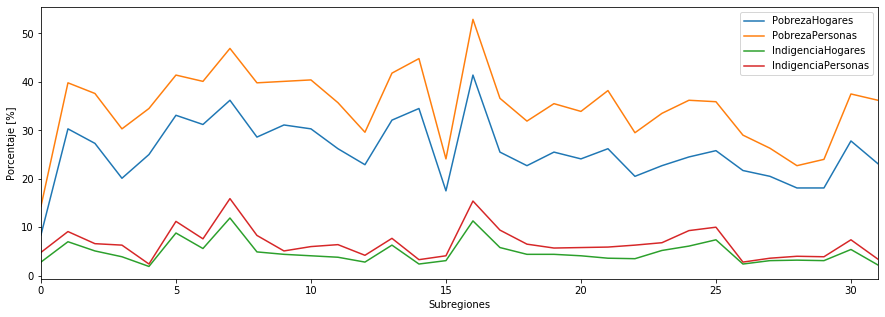

In [44]:
# series apiladas
data2.plot(figsize=(15,5))
plt.xlabel("Subregiones")
plt.ylabel("Porcentaje [%]")

Text(0, 0.5, 'Porcentaje [%]')

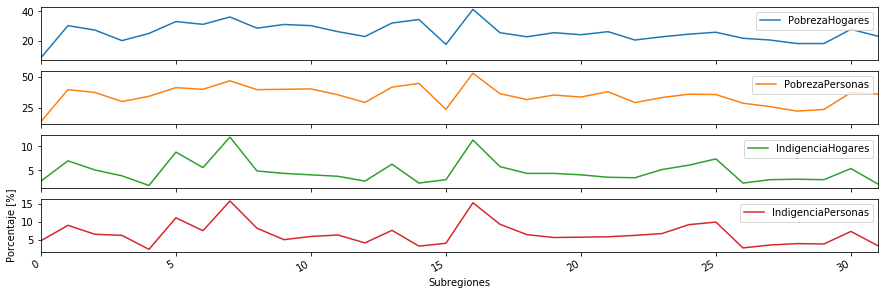

In [43]:
# series separadas
data2.plot(figsize=(15,5), subplots=True)
plt.xlabel("Subregiones")
plt.ylabel("Porcentaje [%]")

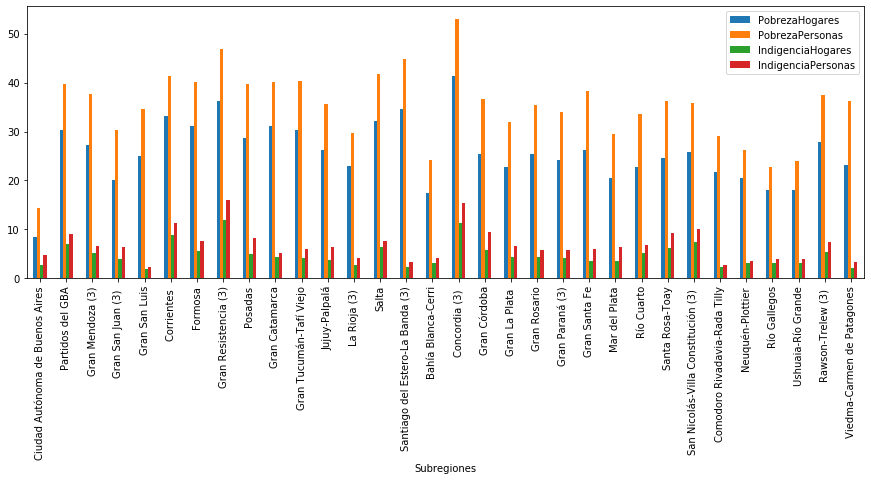

In [54]:
# cambiamos el tipo de grafico a bar
data2.plot(x="Subregiones", kind="bar", figsize=(15,5));

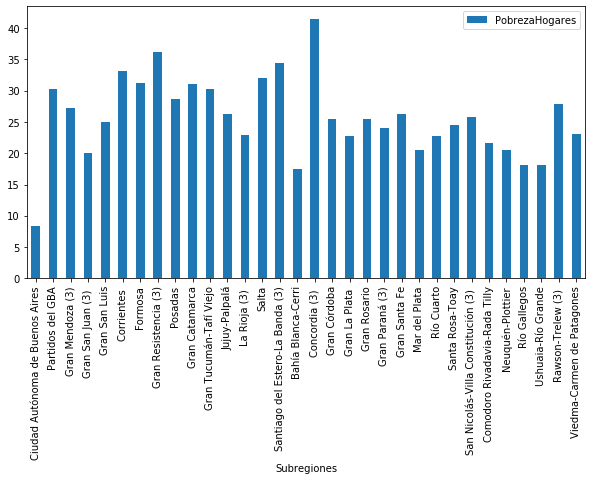

In [55]:
# graficamos una serie (columna) especificada en el parámetro y
data2.plot(x = "Subregiones", y="PobrezaHogares", kind="bar", figsize=(10,5));
plt.savefig("pobreza_hogares.pdf")

### Selección

**Por columnas**

Tenemos dos formas de seleccionar columnas:

- **Como un diccionario:** ``data["NombreColumna"]`` <- mejor!
- Como un método: ``data.NombreColumna``

Atención: revisar antes los nombres de las columnas por si tenemos espacios antes o después: ``data2.columns``

In [56]:
data2.columns

Index(['Regiones', 'Subregiones', 'PobrezaHogares', 'PobrezaPersonas',
       'IndigenciaHogares', 'IndigenciaPersonas'],
      dtype='object')

In [57]:
data2["Regiones"].head()

0    Gran Buenos Aires 
1    Gran Buenos Aires 
2                  Cuyo
3                  Cuyo
4                  Cuyo
Name: Regiones, dtype: object

In [59]:
data2.Regiones.head()

0    Gran Buenos Aires 
1    Gran Buenos Aires 
2                  Cuyo
3                  Cuyo
4                  Cuyo
Name: Regiones, dtype: object

- **Podemos seleccionar columnas usando un índice numérico** ``.iloc[:,3]`` separando por comas las filas de las columnas.

In [60]:
# una única columna
data2.iloc[:,3]

0     14.3
1     39.8
2     37.6
3     30.3
4     34.5
5     41.4
6     40.1
7     46.9
8     39.8
9     40.1
10    40.4
11    35.7
12    29.6
13    41.8
14    44.8
15    24.1
16    52.9
17    36.6
18    31.9
19    35.5
20    33.9
21    38.2
22    29.5
23    33.5
24    36.2
25    35.9
26    29.0
27    26.3
28    22.7
29    24.0
30    37.5
31    36.2
Name: PobrezaPersonas, dtype: float64

In [61]:
# o varias columnas
data2.iloc[:,[0,3,1]]

Regiones  PobrezaPersonas                          Subregiones
0   Gran Buenos Aires              14.3      Ciudad Autónoma de Buenos Aires
1   Gran Buenos Aires              39.8                     Partidos del GBA
2                 Cuyo             37.6                     Gran Mendoza (3)
3                 Cuyo             30.3                   Gran San Juan (3) 
4                 Cuyo             34.5                        Gran San Luis
5              Noreste             41.4                          Corrientes 
6              Noreste             40.1                              Formosa
7              Noreste             46.9                 Gran Resistencia (3)
8              Noreste             39.8                              Posadas
9             Noroeste             40.1                       Gran Catamarca
10            Noroeste             40.4              Gran Tucumán-Tafí Viejo
11            Noroeste             35.7                        Jujuy-Palpalá
12            Noroeste             29.6                        La Rioja (3) 
13            Noroeste             41.8                                Salta
14            Noroeste             44.8     Santiago del Estero-La Banda (3)
15            Pampeana             24.1                   Bahía Blanca-Cerri
16            Pampeana             52.9                       Concordia (3) 
17            Pampeana             36.6                         Gran Córdoba
18            Pampeana             31.9                       Gran La Plata 
19            Pampeana             35.5                         Gran Rosario
20            Pampeana             33.9                      Gran Paraná (3)
21            Pampeana             38.2                        Gran Santa Fe
22            Pampeana             29.5                        Mar del Plata
23            Pampeana             33.5                           Río Cuarto
24            Pampeana             36.2                      Santa Rosa-Toay
25            Pampeana             35.9  San Nicolás-Villa Constitución (3) 
26           Patagonia             29.0        Comodoro Rivadavia-Rada Tilly
27           Patagonia             26.3                     Neuquén-Plottier
28           Patagonia             22.7                         Río Gallegos
29           Patagonia             24.0                   Ushuaia-Río Grande
30           Patagonia             37.5                   Rawson-Trelew (3) 
31           Patagonia             36.2           Viedma-Carmen de Patagones

**Por filas**

- Usando slices: ``data[1:5]``


In [70]:
data2[5:6]

Regiones  Subregiones  PobrezaHogares    PobrezaPersonas   \
5  Noreste  Corrientes              33.1               41.4   

    IndigenciaHogares   IndigenciaPersonas  IndigenciaHogares  
5                 8.8                 11.2                8.8

- Selección de una única fila determinada

In [72]:
data2.iloc[2] # en versiones viejas se llamaba .ix[]

Regiones                           Cuyo
Subregiones            Gran Mendoza (3)
PobrezaHogares                     27.3
 PobrezaPersonas                   37.6
 IndigenciaHogares                  5.1
 IndigenciaPersonas                 6.6
Name: 2, dtype: object

### Crear nuevas columnas

- Es posible agregar nuevas columnas al dataframe usando una práctica similar a los diccionarios:

In [62]:
data2["PobrezaPromedio"] = (data2["PobrezaHogares"] + data2["PobrezaPersonas"])/2

In [63]:
data2.head()

Regiones                      Subregiones  PobrezaHogares  \
0  Gran Buenos Aires   Ciudad Autónoma de Buenos Aires             8.4   
1  Gran Buenos Aires                  Partidos del GBA            30.3   
2                Cuyo                 Gran Mendoza (3)            27.3   
3                Cuyo               Gran San Juan (3)             20.1   
4                Cuyo                    Gran San Luis            25.0   

   PobrezaPersonas  IndigenciaHogares  IndigenciaPersonas  PobrezaPromedio  
0             14.3                2.8                 4.8            11.35  
1             39.8                7.0                 9.1            35.05  
2             37.6                5.1                 6.6            32.45  
3             30.3                3.9                 6.3            25.20  
4             34.5                1.9                 2.4            29.75

#### Ejercitación 6.3

- Corrija en dataframe el nombre de aquellas columnas que contienen espacios
- Agregue una nueva columna para almacenar el promedio de los valores de indigencia
- Realice un gráfico de dispersión (``kind=scatter``) entre las dos columnas de pobreza (hogares y personas)
- Repita el item previo para los valores de indigencia

## Algunas observaciones

Los plots realizados en pandas pueden ser todos hechos desde matplotlib tal como vimos la clase pasada. En algunos casos resulta mas amigable el código aunque extenso.

Por ejemplo:

```python
from matplotlib import pyplot as plt
import pandas as pd

data = pd.read_csv("mis_datos.csv", sep=";")

# genero el gráfico
data.plot(kind="scatter", x='x', y='y', s=sizes)

# agrego el título
plt.title('Fuel efficiency vs Horse-power')

# x-axis label
plt.xlabel('Horse-power')

# y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# ver el plot
plt.show()
```